Barcode Detected


<ipython-input-2-9732e76f6505>:32: DeprecationWarning: `np.int0` is a deprecated alias for `np.intp`.  (Deprecated NumPy 1.24)
  box = np.int0(box)


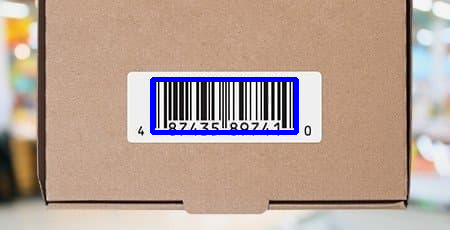

In [2]:
import numpy as np
import argparse
import cv2
from google.colab.patches import cv2_imshow
import imutils

image_path = '/content/custom-barcode-labels.jpg'
image = cv2.imread(image_path)
img = image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ddepth = cv2.CV_32F
gradX = cv2.Sobel(gray, ddepth=ddepth, dx=1, dy=0, ksize=-1)
gradY = cv2.Sobel(gray, ddepth=ddepth, dx=0, dy=1, ksize=-1)
gradient = cv2.subtract(gradX, gradY)
gradient = cv2.convertScaleAbs(gradient)

blurred = cv2.blur(gradient, (9, 9))
_, thresh = cv2.threshold(blurred, 225, 255, cv2.THRESH_BINARY)

kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (21, 7))
closed = cv2.morphologyEx(thresh, cv2.MORPH_CLOSE, kernel)
closed = cv2.erode(closed, None, iterations=4)
closed = cv2.dilate(closed, None, iterations=4)

cnts = cv2.findContours(closed.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
cnts = imutils.grab_contours(cnts)
c = sorted(cnts, key=cv2.contourArea, reverse=True)[0]

rect = cv2.minAreaRect(c)
area = cv2.contourArea(c)
box = cv2.boxPoints(rect)
box = np.int0(box)
if area > 1000:
    print("Barcode Detected")
    cv2.drawContours(img, [box], -1, (255, 0, 0), 3)

cv2_imshow(image)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')